In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

# plot result
plt.figure(1, figsize=(10, 3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [4]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.1)
    loss_fun = torch.nn.MSELoss()
    
    for t in range(200):
        prediction = net1(x)
        loss = loss_fun(prediction, y)
#         print(loss.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net1, "net.pkl") # save the entire net
    torch.save(net1.state_dict(), "net_params.pkl") # save the parameters
    
    plt.subplot(131)
    plt.title("Net1")
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)

In [5]:
def restore_net():
    net2 = torch.load("net.pkl")
    prediction = net2(x)
    
    plt.subplot(132)
    plt.title("Net2")
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)

In [6]:
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    net3.load_state_dict(torch.load("net_params.pkl"))
    prediction = net3(x)
    
    plt.subplot(133)
    plt.title("Net3")
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)

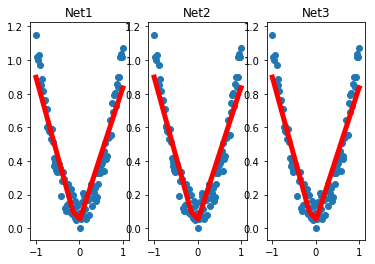

In [7]:
save()
restore_net()
restore_params()
plt.show()